In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

dir_list = os.listdir('Primary Care Calibration\\Manually Validated Participants')
calList = pandas.read_excel('Primary Care Calibration\\Manually Validated Participants\\Calibration List.xlsx').to_numpy()

inds = np.zeros(len(dir_list)-1)
for i in range(len(dir_list)-1):
    if calList[i, 1]=='Good':
        inds[i] = 1

In [2]:
centroids = np.zeros(shape=(6, 2, int(sum(inds))))
m=0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()
        for l in range(len(data[:, 0])):
            if data[l, 4]<0 or data[l, 5]<0:
                data[l, 3] = 0

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        centroids[:, :, m] = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(validData[:, 4:]).cluster_centers_
        m = m+1

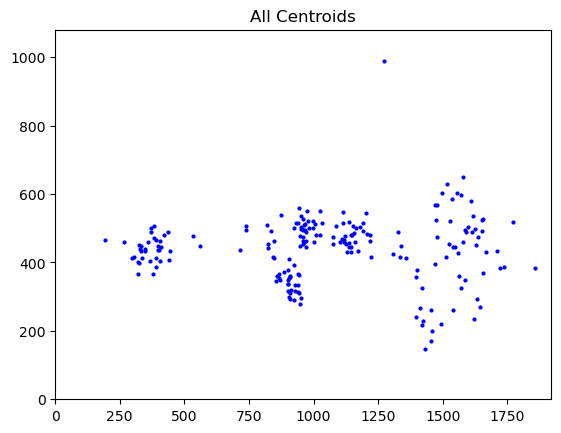

In [3]:
for i in range(int(sum(inds))):
    plt.plot(centroids[:, 0, i], centroids[:, 1, i], 'o', color='b', markersize=2)
plt.title('All Centroids')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.show()

[]


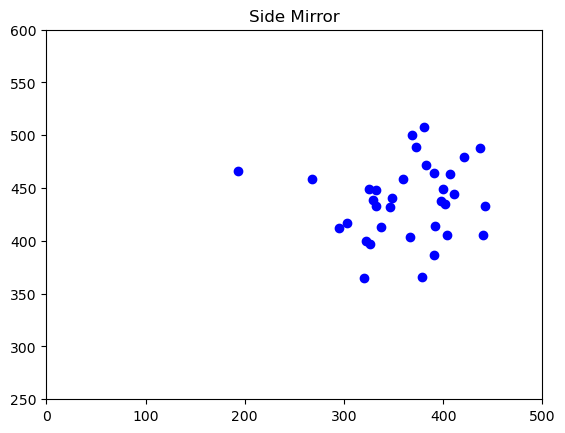

In [4]:
sidem = np.zeros(shape=(3, int(sum(inds))))
for i in range(int(sum(inds))):
    m = 0
    for j in range(6):
        if 0 < centroids[j, 0, i] < 500 and 250 < centroids[j, 1, i] < 600:
            sidem[:2, i] = centroids[j, :, i]
            sidem[2, i] = 1
            plt.plot(sidem[0, i], sidem[1, i], 'o', color='blue')
            if m != 0:
                print('Duplicate Found')
            m = m + 1

print(np.where(sidem[0, :]==0)[0])
plt.title('Side Mirror')
plt.xlim(0, 500); plt.ylim(250, 600)
plt.show()

np.save('clusterData\\sidem_kmeans_n=5', sidem)


[21 26]


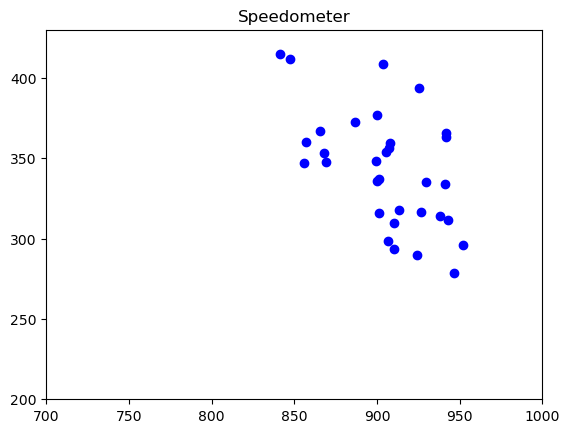

In [5]:
xmin = 700; xmax = 1000
ymin = 200; ymax = 430

speedom = np.zeros(shape=(3, int(sum(inds))))
for i in range(int(sum(inds))):
    m = 0
    for j in range(6):
        if xmin < centroids[j, 0, i] < xmax and ymin < centroids[j, 1, i] < ymax:
            speedom[:2, i] = centroids[j, :, i]
            speedom[2, i] = 1
            plt.plot(speedom[0, i], speedom[1, i], 'o', color='blue')
            if m != 0:
                print('Duplicate Found')
            m = m + 1

print(np.where(speedom[0, :]==0)[0])   
plt.title('Speedometer')
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.show()

np.save('clusterData\\speedom_kmeans_n=5', speedom)


Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
1


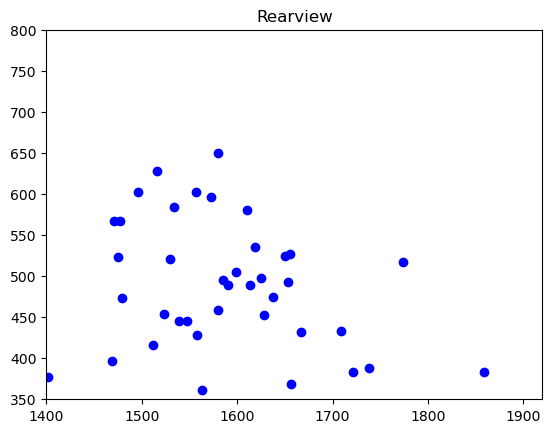

In [6]:
xmin = 1400; xmax = 1920
ymin = 350; ymax = 800

rv = np.zeros(shape=(3, int(sum(inds))))
for i in range(int(sum(inds))):
    m = 0
    for j in range(6):
        if xmin < centroids[j, 0, i] < xmax and ymin < centroids[j, 1, i] < ymax:
            rv[:2, i] = centroids[j, :, i]
            rv[2, i] = 1
            plt.plot(rv[0, i], rv[1, i], 'o', color='blue')
            if m != 0:
                print('Duplicate Found')
            m = m + 1

print(len(np.where(rv[0, :]==0)[0]))         
plt.title('Rearview')
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.show()

np.save('clusterData\\rv_kmeans_n=5', rv)

Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
Duplicate Found
2


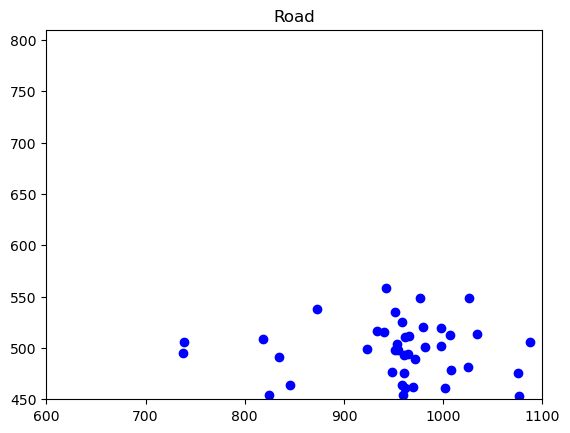

In [7]:
xmin = 600; xmax = 1100
ymin = 450; ymax = 810

road = np.zeros(shape=(3, int(sum(inds))))
for i in range(int(sum(inds))):
    m = 0
    for j in range(6):
        if xmin < centroids[j, 0, i] < xmax and ymin < centroids[j, 1, i] < ymax:
            road[:2, i] = centroids[j, :, i]
            road[2, i] = 1
            plt.plot(road[0, i], road[1, i], 'o', color='blue')
            if m != 0:
                print('Duplicate Found')
            m = m + 1

print(len(np.where(road[0, :]==0)[0]))         
plt.title('Road')
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.show()

np.save('clusterData\\road_kmeans_n=5', road)

15


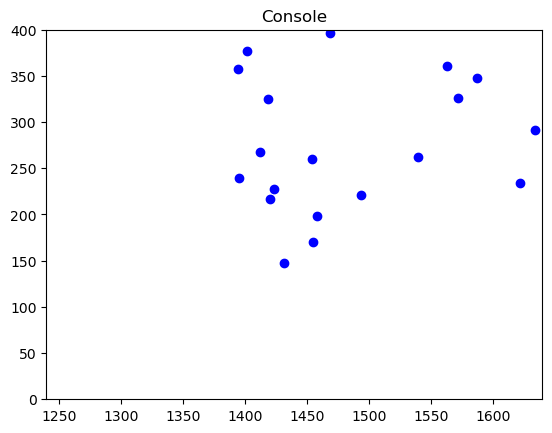

In [8]:
xmin = 1240; xmax = 1640
ymin = 0; ymax = 400

console = np.zeros(shape=(3, int(sum(inds))))
for i in range(int(sum(inds))):
    m = 0
    for j in range(6):
        if xmin < centroids[j, 0, i] < xmax and ymin < centroids[j, 1, i] < ymax:
            console[:2, i] = centroids[j, :, i]
            console[2, i] = 1
            plt.plot(console[0, i], console[1, i], 'o', color='blue')
            if m != 0:
                print('Duplicate Found')
            m = m + 1

print(len(np.where(console[0, :]==0)[0]))         
plt.title('Console')
plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
plt.show()

np.save('clusterData\\panel_kmeans_n=5', console)

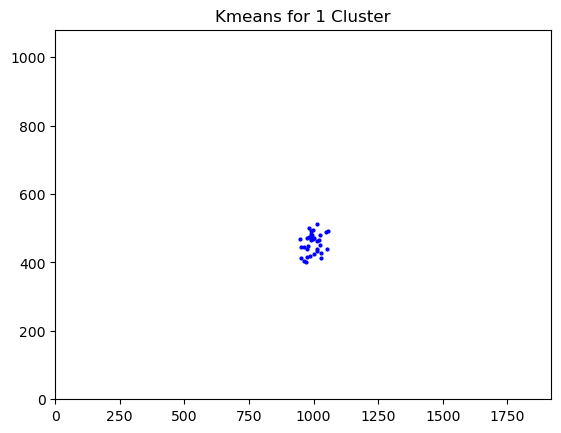

In [103]:
centroids = np.zeros(shape=(3, int(sum(inds))))
m=0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        centroids[:2, m] = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(validData[:, 4:]).cluster_centers_
        centroids[2, m] = 1
        m = m+1

for i in range(int(sum(inds))):
    plt.plot(centroids[0, i], centroids[1, i], 'o', color='b', markersize=2)
plt.title('Kmeans for 1 Cluster')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.show()

np.save('clusterData\\gen_kmeans_n=1', centroids)
